In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [32]:
df = pd.read_csv('epa-sea-level.csv')
df.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN


No handles with labels found to put in legend.


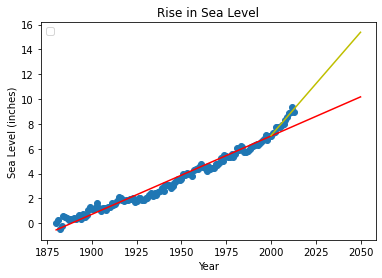

In [35]:
def draw_plot():

    # Use matplotlib to create a scatter plot using the "Year" column as the x-axis and the "CSIRO Adjusted Sea Level"
    # column as the y-axix
    x = df['Year']
    y = df['CSIRO Adjusted Sea Level']
    plt.scatter(x,y)


    # Plot the first line of best fit over the top of the scatter plot. Make the line go through the year 2050 to predict the
    # sea level rise in 2050
    result = linregress(x, y)
    x_prediction = np.arange(1880,2051)
    # Line/linear equation -> y = mx + c
    y_prediction = result.slope * x_prediction + result.intercept
    plt.plot(x_prediction, y_prediction, 'r')

    # Plot the second line of best fit just using the data from year 2000 through the most recent year in the dataset.
    # Make the line also go through the year 2050 to predict the sea level rise in 2050 if the rate of rise continues as
    # it has since the year 2000
    new_df = df.loc[df['Year'] >= 2000]
    new_x = new_df['Year']
    new_y = new_df['CSIRO Adjusted Sea Level']
    new_result = linregress(new_x, new_y)
    new_x_prediction = np.arange(2000,2051)
    new_y_prediction = new_result.slope * new_x_prediction + new_result.intercept
    plt.plot(new_x_prediction, new_y_prediction, 'y')

    # Add labels and title

    plt.xlabel('Year')
    plt.ylabel('Sea Level (inches)')
    plt.title('Rise in Sea Level')

draw_plot()
